In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn;
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

Reduced dataset shape: (569, 2)
0.005 x mean radius + 0.002 x mean texture + 0.035 x mean perimeter + 0.517 x mean area + 0.000 x mean smoothness + 0.000 x mean compactness + 0.000 x mean concavity + 0.000 x mean concave points + 0.000 x mean symmetry + -0.000 x mean fractal dimension + 0.000 x radius error + -0.000 x texture error + 0.002 x perimeter error + 0.056 x area error + -0.000 x smoothness error + 0.000 x compactness error + 0.000 x concavity error + 0.000 x concave points error + -0.000 x symmetry error + -0.000 x fractal dimension error + 0.007 x worst radius + 0.003 x worst texture + 0.049 x worst perimeter + 0.852 x worst area + 0.000 x worst smoothness + 0.000 x worst compactness + 0.000 x worst concavity + 0.000 x worst concave points + 0.000 x worst symmetry + 0.000 x worst fractal dimension
0.009 x mean radius + -0.003 x mean texture + 0.063 x mean perimeter + 0.852 x mean area + -0.000 x mean smoothness + -0.000 x mean compactness + 0.000 x mean concavity + 0.000 x m

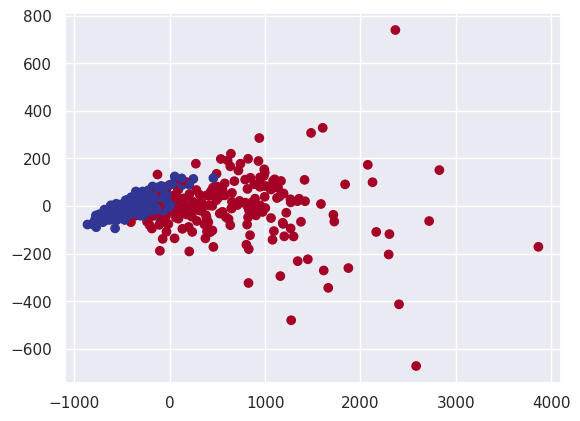

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA
import pylab as pl

# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

# Create a scatter plot of the reduced data
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='RdYlBu')

# Print the meaning of the 2 components
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                         for value, name in zip(component, cancer.feature_names)))


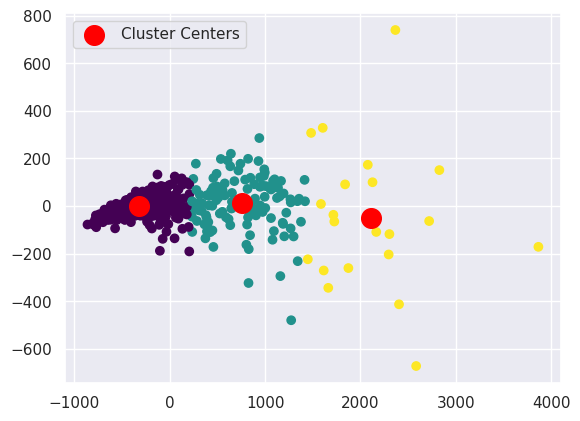

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering to the reduced data
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)

cluster_labels = kmeans.fit_predict(X_reduced)

# Create a scatter plot of the reduced data with cluster labels
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis')

# Add cluster centers to the plot
pl.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Cluster Centers')

pl.legend()
pl.show()

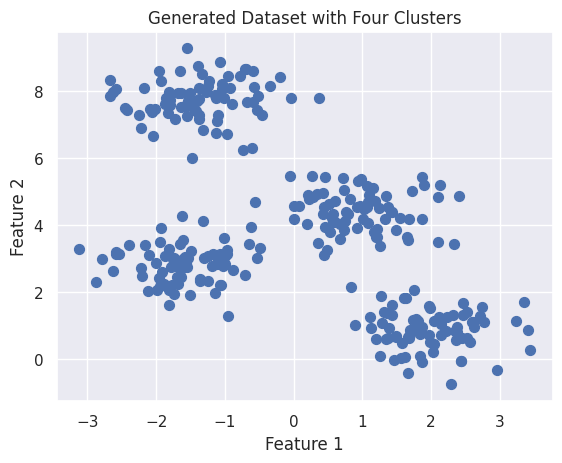

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate a dataset with 300 data points, divided into four clusters
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)

# Create a scatter plot to visualize the generated dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Dataset with Four Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


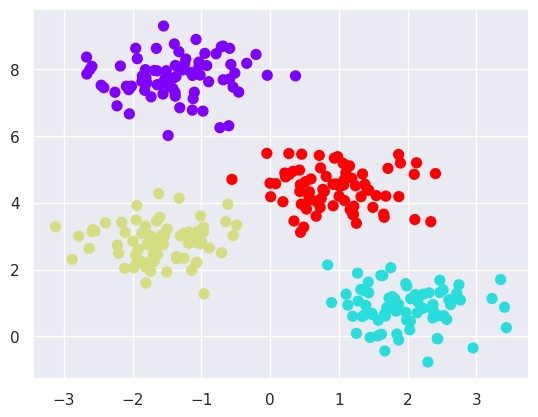

In [ ]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');